In [158]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import figure

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14, 10)

#col_pal = sns.color_palette()

In [159]:
#data frame and qucik look at data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [160]:
df.size #display dataset size

115020

### Preprocessing
The following code down below showcases data cleaning

In [161]:

#droping nulls
for i, row in df.iterrows():
    nulls = row.isnull().sum()

    if nulls > 0:
        df.drop(i, inplace=True)

df.reset_index(drop=True, inplace=True)


In [162]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [163]:
#sorting by gross
df.sort_values(by=['gross'], inplace=False, ascending=False)
pd.set_option('display.max_rows', None)


### Summary statistics

In [164]:
stats = df[['budget', 'gross', 'votes', 'runtime']].describe()
skew = df[['budget', 'gross', 'votes', 'runtime']].skew().tolist()

#display statistics
stats

,budget,gross,votes,runtime
count,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,3.600917e+07,1.032297e+08,1.150661e+05,108.152739
std,4.157337e+07,1.873027e+08,1.844073e+05,18.115698
min,6.000000e+03,3.090000e+02,1.950000e+02,63.000000
25%,1.000000e+07,1.073640e+07,1.900000e+04,95.000000
50%,2.180000e+07,3.686941e+07,5.200000e+04,105.000000
75%,4.500000e+07,1.124625e+08,1.290000e+05,118.000000
max,3.560000e+08,2.847246e+09,2.400000e+06,271.000000


### Data correlations
**Scatter plots**
Scatter plots of budget/earnings

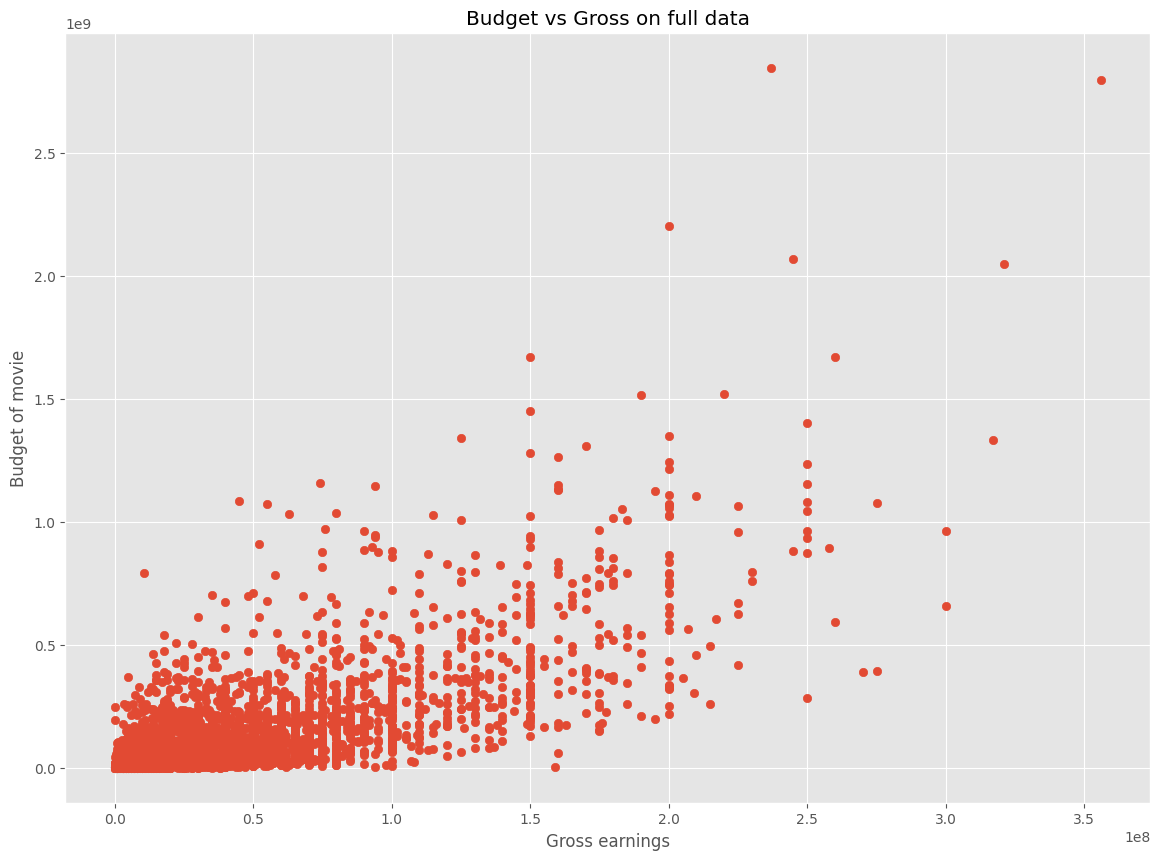

In [165]:
#scatter plot for full data
plt.title('Budget vs Gross on full data')
plt.xlabel('Gross earnings')
plt.ylabel('Budget of movie')
plt.scatter(x=df['budget'], y=df['gross'])
plt.show()

In [166]:
#getting top 500 movies based on their gross
fh_copy = df.copy()
top_fh_gr = fh_copy.nlargest(500, 'gross')
top_fh = top_fh_gr.head(500)

#displaying
top_fh.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


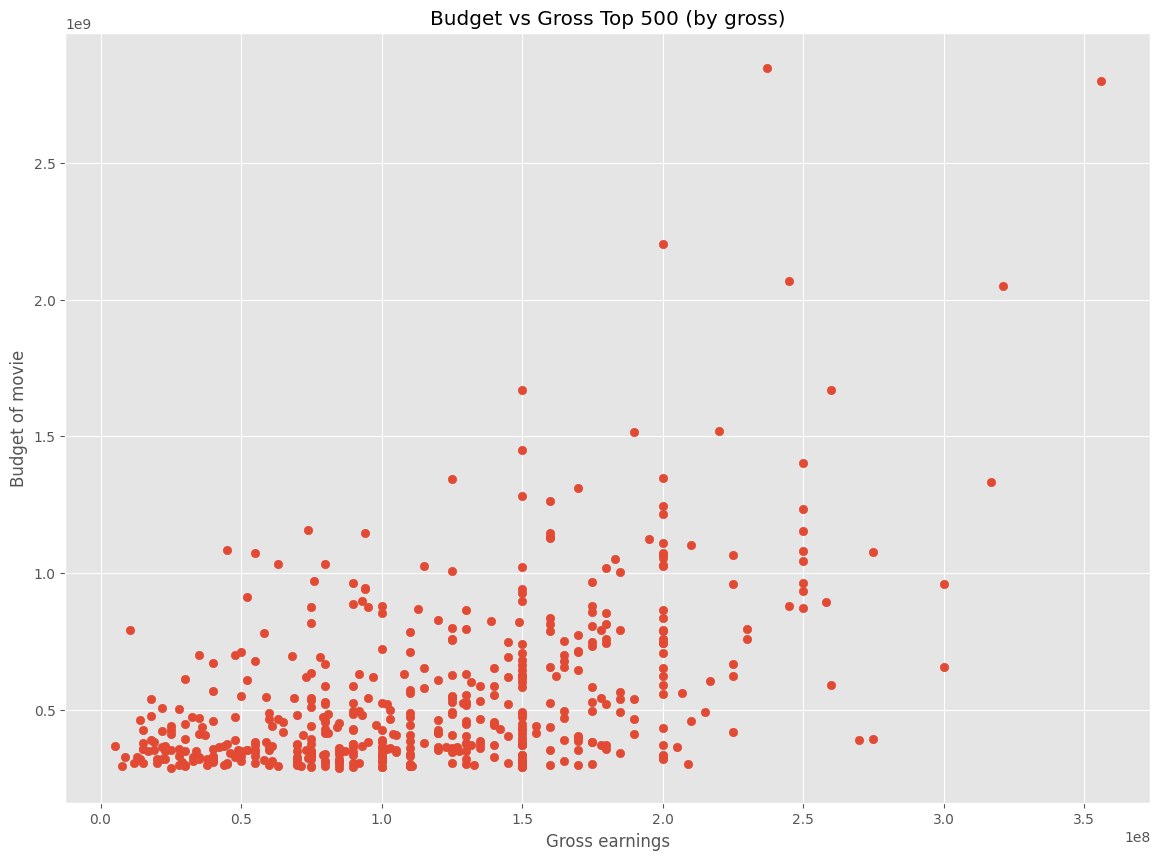

In [167]:
#scatter plot for top 500 movies based on gross

plt.title('Budget vs Gross Top 500 (by gross)')
plt.xlabel('Gross earnings')
plt.ylabel('Budget of movie')
plt.scatter(x=top_fh['budget'], y=top_fh['gross'])
plt.show()

Regression plots for movies

<Axes: xlabel='budget', ylabel='gross'>

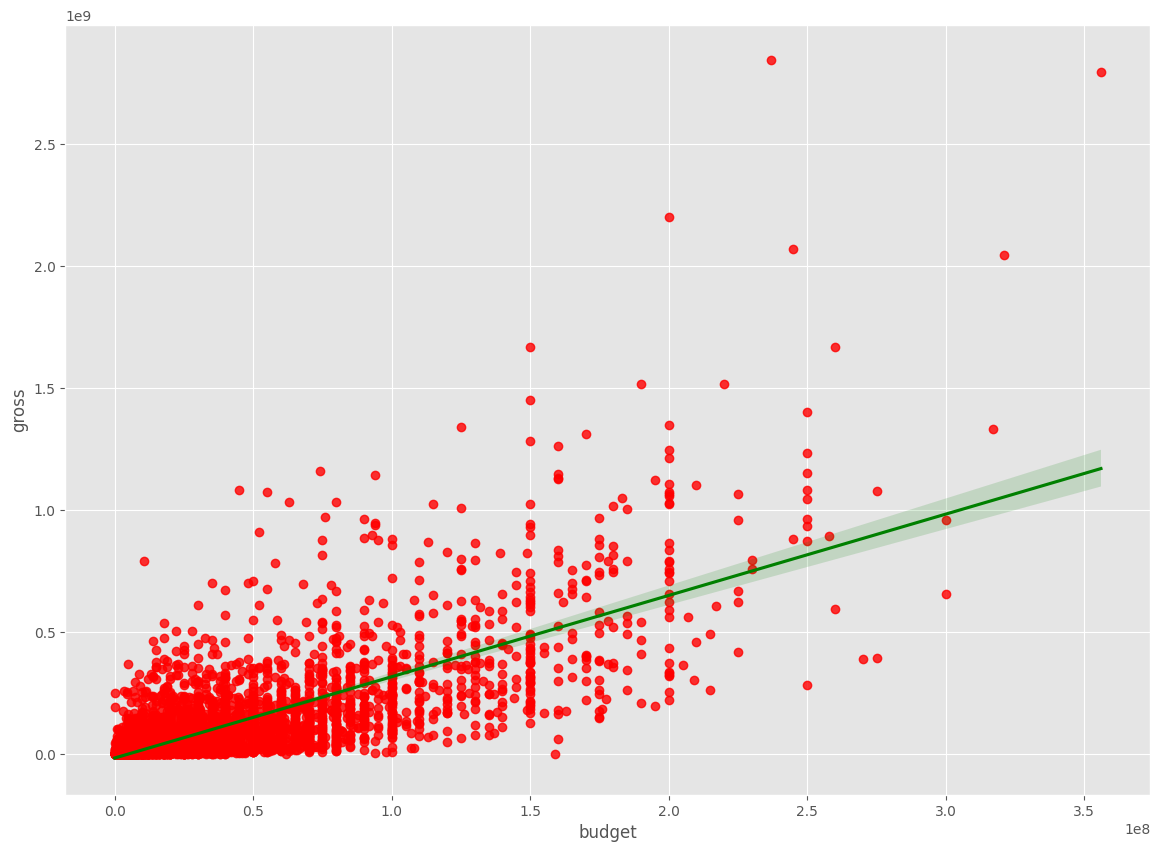

In [168]:
#regression plot with seaborn for all the movies
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"green"})


<Axes: xlabel='budget', ylabel='gross'>

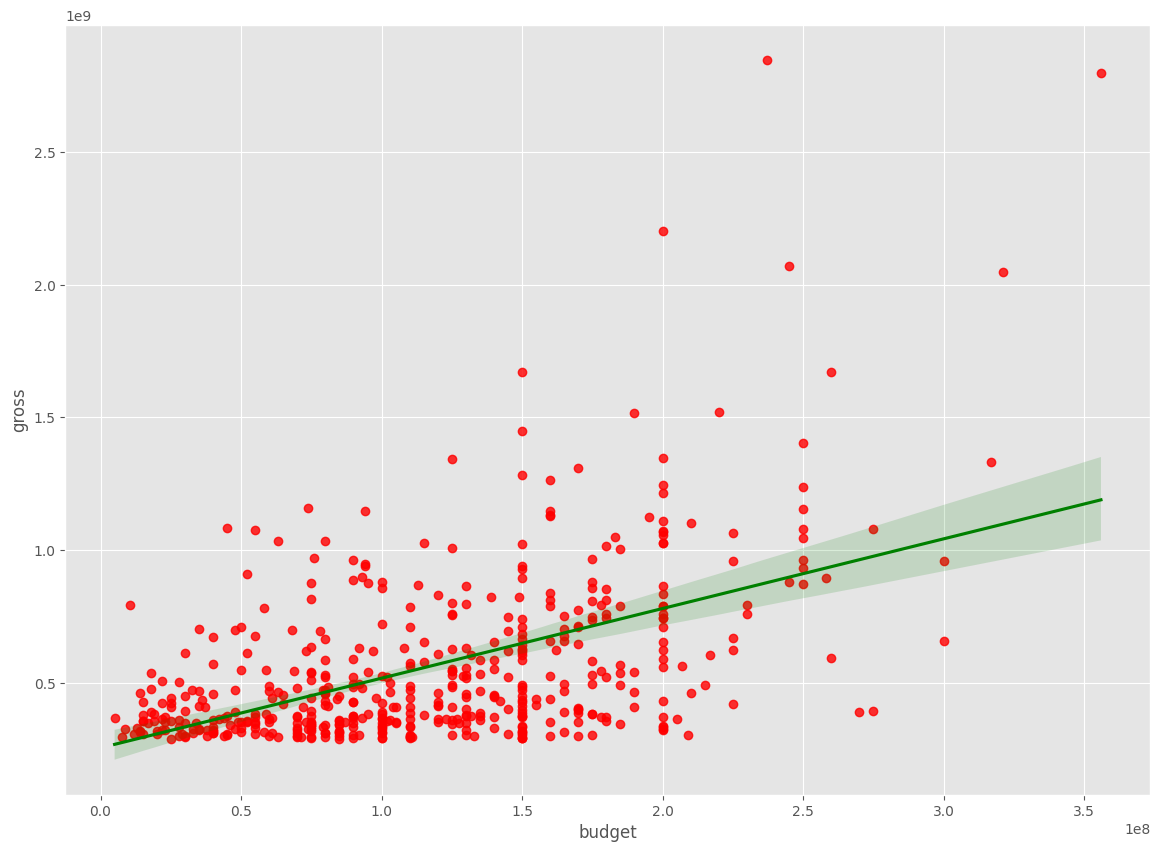

In [169]:
#regresion plot for 500 moviers with top gross
sns.regplot(x='budget', y='gross', data=top_fh, scatter_kws={"color": "red"}, line_kws={"color":"green"})

In [170]:
numerics = df.select_dtypes(include=[np.number])
numerics.corr() #base is pearson correlation method which measures the strength of the linear relationship between two variables

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


#### Correlation matrix
Based of correlation done with pearson method on data we can see a strong link between budget and gross which we can furher visualize by using correlation matrix

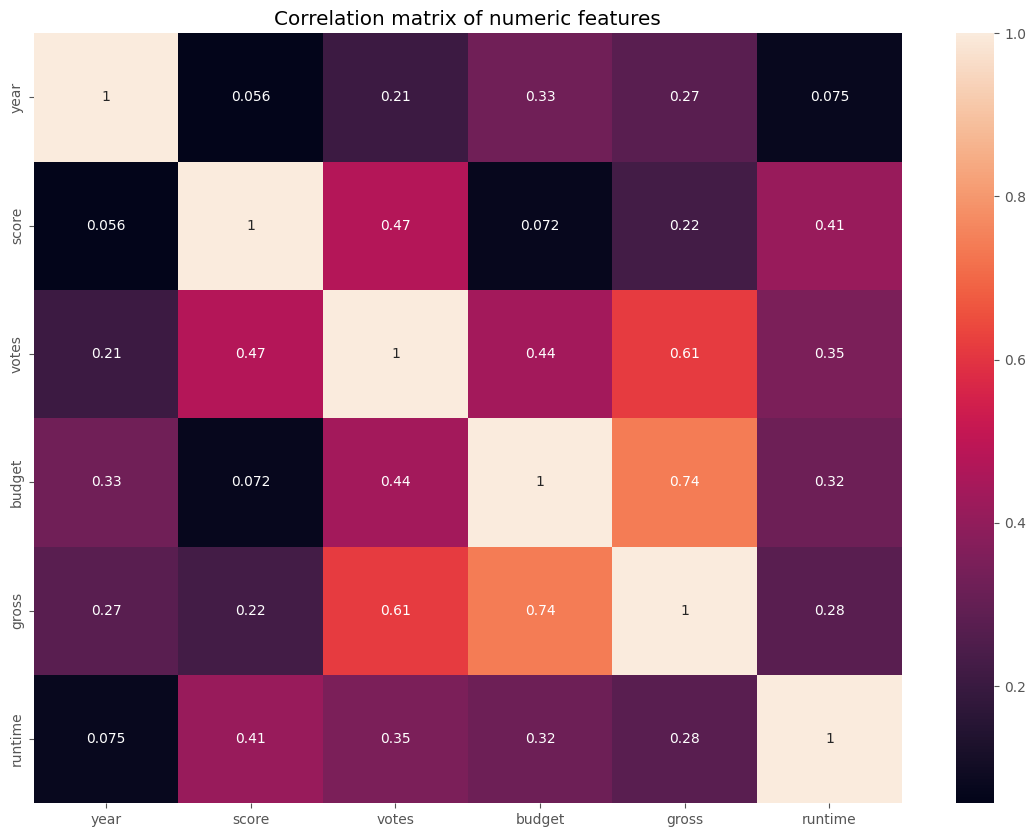

In [171]:
cor_mat = numerics.corr()

plt.title("Correlation matrix of numeric features")

sns.heatmap(cor_mat, annot=True)

plt.show()

the darker the color the lesser is the correlation between the variables